<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/FIFA-WEB-SCRAPING/blob/main/FIFA_WEB_SCRAPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

In [ ]:
url = 'https://sofifa.com/players?offset=0'
req = requests.get(url)

In [ ]:
import requests

url = 'https://sofifa.com/players?offset=0'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

req = requests.get(url, headers=headers)


In [ ]:
req

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html class="is-preload dark" data-class="is-preload  dark" id="html" lang="en-US">\n <head id="head">\n  <title>\n   Players FC 24 Dec 18, 2023 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FC 24 player ratings on Dec 18, 2023" name="description"/>\n  <meta content="2009 - 2024 SoFIFA.com" name="copyright"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>\n  <link crossorigin="" href="https://cdn.intergient.com/" rel="preconnect"/>\n  <link href="https://cdn.intergient.com/" rel="dns-prefetch"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="

In [ ]:
soup

<!DOCTYPE html>
<html class="is-preload dark" data-class="is-preload  dark" id="html" lang="en-US">
<head id="head">
<title>Players FC 24 Dec 18, 2023 SoFIFA</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>
<meta content="FC 24 player ratings on Dec 18, 2023" name="description"/>
<meta content="2009 - 2024 SoFIFA.com" name="copyright"/>
<link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>
<link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>
<link crossorigin="" href="https://cdn.intergient.com/" rel="preconnect"/>
<link href="https://cdn.intergient.com/" rel="dns-prefetch"/>
<script>window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];</script>
<link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>
<link href="https://sofifa.com/players?hl=fr-

In [ ]:
fifa_final=[]

In [ ]:
import requests
NAME=[]
CLUB=[]
TOTAL_STATS=[]
arr=[]
OVR=[]
POT=[]
WAGE=[]
VALUE=[]
AGE=[]
PLAYER_IMAGE=[]
url = 'https://sofifa.com/players?offset=300'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

req = requests.get(url, headers=headers)
soup = BeautifulSoup(req.content)

for i in soup.findAll('tr'):
      arr.append(i)
del arr[0]
for i in range(len(arr)):
      name=re.sub('<a.*">|.</a>',"",str(arr[i].find('a')))
      NAME.append(name)
      club=re.sub('<a.*">|</a>',"",str(arr[i].findAll('a')[-1]))
      CLUB.append(club)
      total_stats=re.sub('<em>|</em>',"",str(arr[i].findAll('em')[2]))
      TOTAL_STATS.append(total_stats)
      ovr=re.sub('<em.*">|</em>',"",str(arr[i].findAll('em')[0]))
      OVR.append(ovr)
      pot=re.sub('<em.*">|</em>',"",str(arr[i].findAll('em')[1]))
      POT.append(pot)
      wage=re.sub('<td.*">|</td>',"",str(arr[i].findAll('td')[-3]))
      WAGE.append(wage)
      value=re.sub('<td.*">|</td>',"",str(arr[i].findAll('td')[-4]))
      VALUE.append(value)
      age=re.sub('<td.*">|</td>',"",str(arr[i].findAll('td')[2]))
      AGE.append(age)
      player_img=re.sub('<img.*data-src="|data-srcset=.*"/>',"",str(arr[i].findAll('img')[0]))
      PLAYER_IMAGE.append(player_img)
fifa = pd.DataFrame({'Image_link':PLAYER_IMAGE, 'Name':NAME, 'Age':AGE,
                    'OVA':OVR, 'POT':POT, 'Team':CLUB,
                    'Value':VALUE, 'Wage':WAGE,
                    'Total_stats':TOTAL_STATS})
fifa_final.append(fifa)



In [ ]:
fifa_df=pd.concat(fifa_final,ignore_index=True)

In [ ]:
fifa_df

,Image_link,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/274/288/24_60.p...,O. Glouk,19,74,86,Salzburg,€10M,€10K,1797
1,https://cdn.sofifa.net/players/264/652/24_60.p...,B. Barcol,20,77,84,Paris Saint Germain,€21M,€55K,1865
2,https://cdn.sofifa.net/players/273/463/24_60.p...,João Gome,22,76,84,Wolverhampton Wanderers,€16M,€44K,2022
3,https://cdn.sofifa.net/players/275/138/24_60.p...,L. Camar,19,68,81,Metz,€2.9M,€5K,1734
4,https://cdn.sofifa.net/players/243/780/24_60.p...,Lee Kang I,22,78,85,Paris Saint Germain,€28.5M,€68K,2019
...,...,...,...,...,...,...,...,...,...
355,https://cdn.sofifa.net/players/264/589/24_60.p...,L. Gechte,19,68,81,Hertha BSC,€2.7M,€3K,1529
356,https://cdn.sofifa.net/players/266/436/24_60.p...,Javi Guerr,20,73,84,Valencia,€6.5M,€19K,1905
357,https://cdn.sofifa.net/players/267/680/24_60.p...,A. Fataw,19,71,86,Leicester City,€4.4M,€6K,On loan
358,https://cdn.sofifa.net/players/267/976/24_60.p...,Pablo Torr,20,71,85,Girona,€4.5M,€48K,On loan


In [ ]:
fifa_df.shape

(360, 9)

In [ ]:
fifa_df.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Value', 'Wage',
       'Total_stats'],
      dtype='object')

In [ ]:
fifa_df.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
# Removing Columns - Image_link & Duration
fifa_df.drop(['Image_link'],inplace = True,axis=1)

In [ ]:
fifa_df

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,B. Barcol,20,77,84,Paris Saint Germain,€21M,€55K,1865
1,João Gome,22,76,84,Wolverhampton Wanderers,€16M,€44K,2022
2,Lee Kang I,22,78,85,Paris Saint Germain,€28.5M,€68K,2019
3,O. Glouk,19,74,86,Salzburg,€10M,€10K,1797
4,O. Bob,19,66,82,Manchester City,€2.2M,€17K,1605
...,...,...,...,...,...,...,...,...
355,I. Ili,22,77,85,Torino,€23.5M,€37K,2049
356,J. Philogen,21,72,81,Hull City,€5.5M,€11K,1732
357,R. Onyedik,22,74,85,Club Brugge,€9M,€16K,1918
358,Pablo Torr,20,71,85,Girona,€4.5M,€48K,On loan


In [ ]:
fifa_df.describe()

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
count,360,360,360,360,360,360,360,360
unique,352,23,32,22,114,158,120,274
top,J. Davi,23,77,84,Real Madrid,€12.5M,€110K,On loan
freq,2,50,31,58,15,13,9,20


In [ ]:
fifa_df.duplicated().sum(axis=0)

7

In [ ]:
fifa_df.drop_duplicates(inplace=True)

In [ ]:
fifa_df.describe(include='all')

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
count,353,353,353,353,353,353,353,353
unique,352,23,32,22,114,158,120,274
top,J. Bellingha,23,77,84,Chelsea,€12.5M,€17K,On loan
freq,2,49,31,58,15,13,9,20


In [ ]:
print(fifa_df[fifa_df['Age']==min(fifa_df['Age'])]['Name'], fifa_df[fifa_df['Age']==max(fifa_df['Age'])]['Age'])



102    G. Ilenikhen
174        L. Mille
Name: Name, dtype: object 47    38
Name: Age, dtype: object


In [ ]:
fifa_df[fifa_df['Age']==min(fifa_df['Age'])]['Name']

102    G. Ilenikhen
174        L. Mille
Name: Name, dtype: object

In [ ]:
fifa_df[fifa_df['Age']==min(fifa_df['Age'])]['Age']

102    16
174    16
Name: Age, dtype: object

In [ ]:
fifa_df.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
28,K. Mbapp,24,91,94,Paris Saint Germain,€181.5M,€230K,2204
72,E. Haalan,22,91,94,Manchester City,€185M,€340K,2158
24,Vini Jr,22,89,94,Real Madrid,€158.5M,€310K,2027
74,J. Musial,20,86,93,FC Bayern München,€134.5M,€79K,2091
157,Pedr,20,86,92,FC Barcelona,€105M,€165K,2138
67,F. Valverd,24,88,92,Real Madrid,€130.5M,€270K,2292
15,J. Bellingha,20,87,92,Real Madrid,€118.5M,€190K,2265
46,K. Kvaratskheli,22,86,92,Napoli,€109M,€95K,2067
48,Rodryg,22,85,91,Real Madrid,€86.5M,€210K,2027
37,R. Arauj,24,86,91,FC Barcelona,€93M,€175K,1946


In [ ]:
fifa_df.sort_values(by='POT',ascending=False)['Name'].head(10)

28            K. Mbapp
72           E. Haalan
24             Vini Jr
74           J. Musial
157               Pedr
67          F. Valverd
15        J. Bellingha
46     K. Kvaratskheli
48              Rodryg
37            R. Arauj
Name: Name, dtype: object

In [ ]:
new_fifa = fifa_df[['Name','POT']]

In [ ]:
new_fifa[['Name']]

,Name
0,B. Barcol
1,João Gome
2,Lee Kang I
3,O. Glouk
4,O. Bob
...,...
355,I. Ili
356,J. Philogen
357,R. Onyedik
358,Pablo Torr


In [ ]:
new_fifa.head(10)

,Name,POT
0,B. Barcol,84
1,João Gome,84
2,Lee Kang I,85
3,O. Glouk,86
4,O. Bob,82
5,S. Jehezke,68
6,Ç. Söyünc,78
7,João Neve,87
8,W. Zaïre-Emer,90
9,K. Maino,87


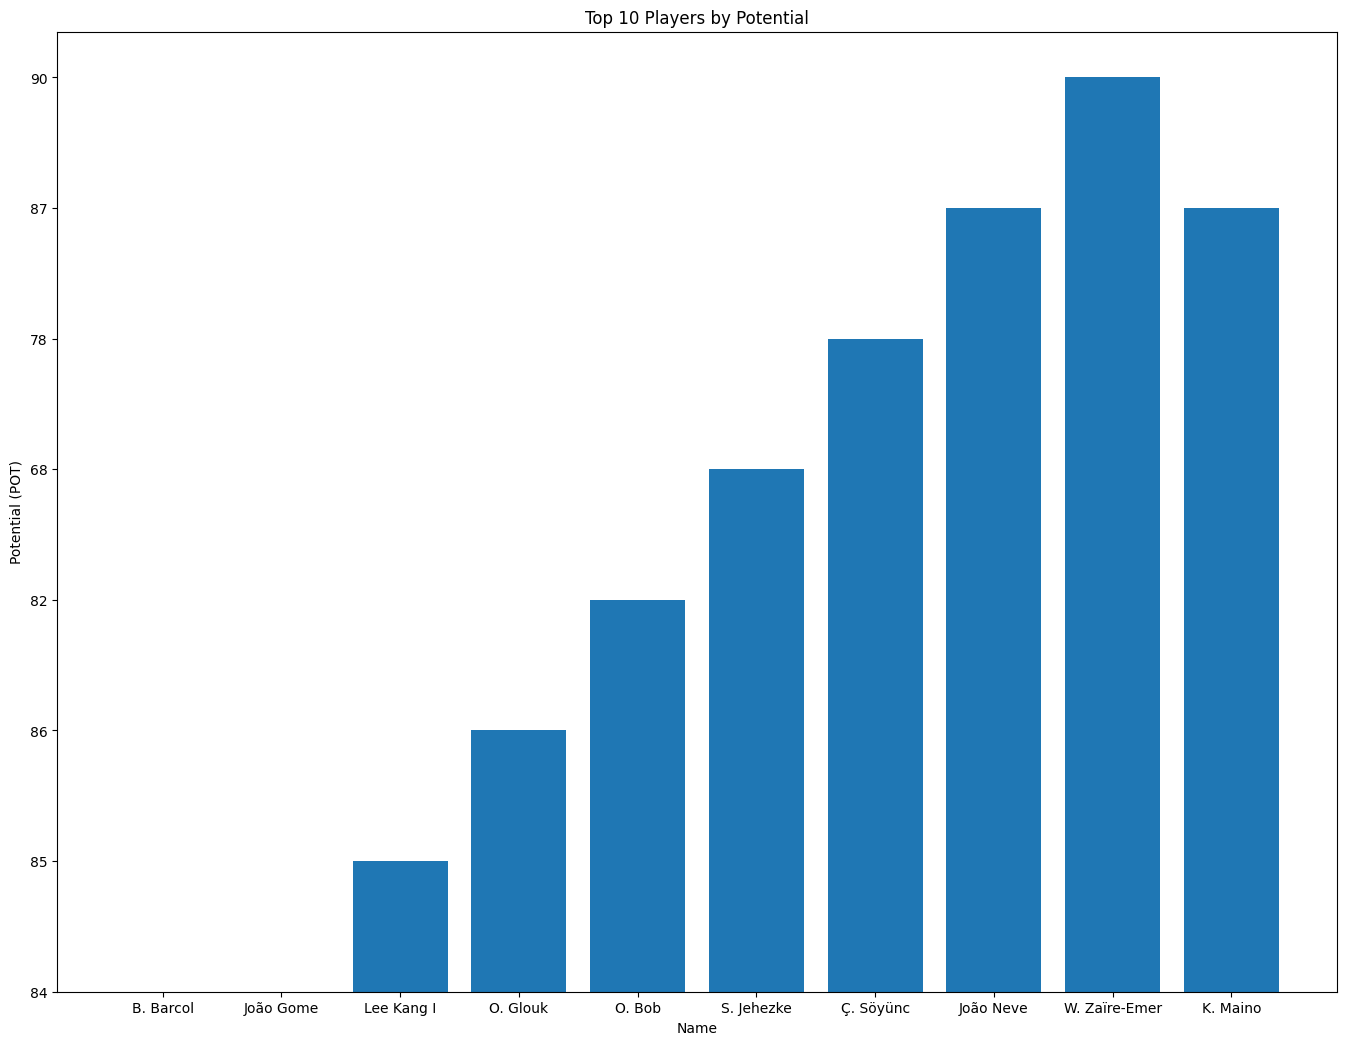

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

# Add axes to the figure
ax = fig.add_axes([1, 1, 2, 2])

# Select data
x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)

# Create a bar plot
ax.bar(x, y)

# Set labels and title
ax.set_xlabel('Name')
ax.set_ylabel('Potential (POT)')
ax.set_title('Top 10 Players by Potential')

# Display the plot
plt.show()


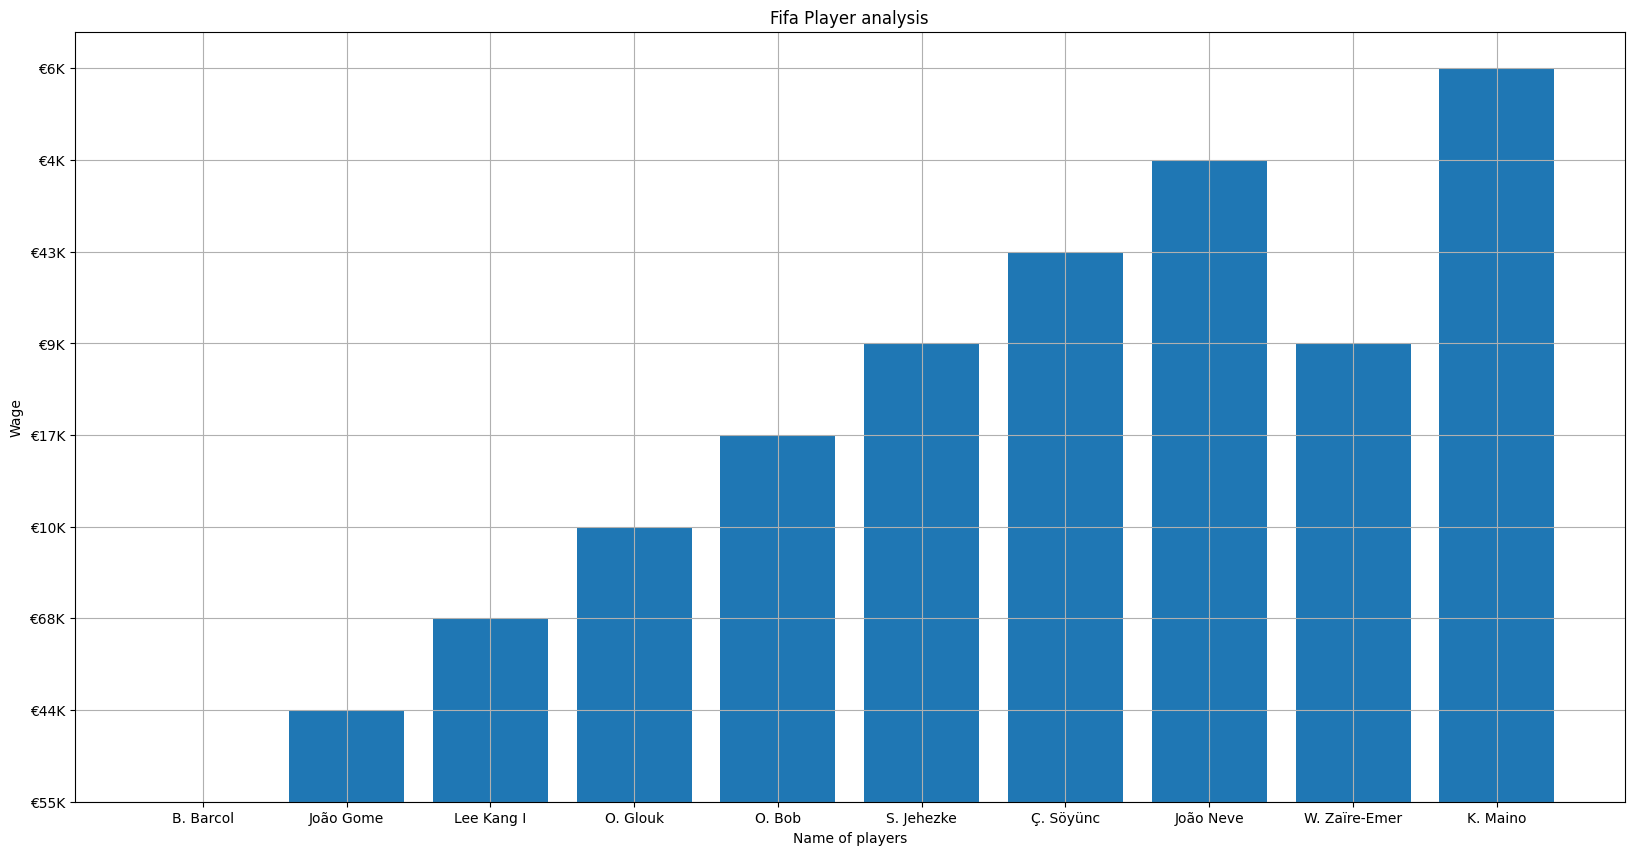

In [ ]:
import matplotlib.pyplot as plt


xpoints = fifa_df['Name'][:10]
ypoints = fifa_df['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()

In [ ]:
fifa_df['POT'] = pd.to_numeric(fifa_df['POT'])

In [ ]:
fifa_df[fifa_df['POT']>=90]['Name']

8        W. Zaïre-Emer
15        J. Bellingha
24             Vini Jr
28            K. Mbapp
37            R. Arauj
46     K. Kvaratskheli
48              Rodryg
50           V. Osimhe
53          Rafael Leã
67          F. Valverd
71           K. Benzem
72           E. Haalan
74           J. Musial
99             F. Wirt
103            L. Mess
118                Gav
130         M. Ødegaar
136          A. Baston
154             B. Sak
157               Pedr
180        K. De Bruyn
183          F. de Jon
195            P. Fode
241      R. Lewandowsk
242             H. Kan
246            G. Kobe
314       G. Donnarumm
Name: Name, dtype: object

In [ ]:
fifa_df['Age'] = pd.to_numeric(fifa_df['Age'])

In [ ]:
fifa_df[(fifa_df['POT']>90) & (fifa_df['Age']<25) ]['Name']

15        J. Bellingha
24             Vini Jr
28            K. Mbapp
37            R. Arauj
46     K. Kvaratskheli
48              Rodryg
50           V. Osimhe
53          Rafael Leã
67          F. Valverd
72           E. Haalan
74           J. Musial
99             F. Wirt
157               Pedr
Name: Name, dtype: object

In [ ]:
fifa_df['Age']

0      27
1      26
2      23
3      24
4      23
       ..
235    19
236    20
237    23
238    24
239    32
Name: Age, Length: 234, dtype: int64

In [ ]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         353 non-null    object
 1   Age          353 non-null    object
 2   OVA          353 non-null    object
 3   POT          353 non-null    object
 4   Team         353 non-null    object
 5   Value        353 non-null    object
 6   Wage         353 non-null    int64 
 7   Total_stats  353 non-null    object
dtypes: int64(1), object(7)
memory usage: 24.8+ KB


In [ ]:
len(fifa_df['Value'])

360

In [ ]:
for i in range(360):
 fifa_df['Wage'][i]=re.sub('€|K|M',"",fifa_df['Wage'][i])

In [ ]:
fifa_df['Wage'] = pd.to_numeric(fifa_df['Wage'])

<ipython-input-188-0393a4b83024>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fifa_df.corr(), annot=True)


<Axes: >

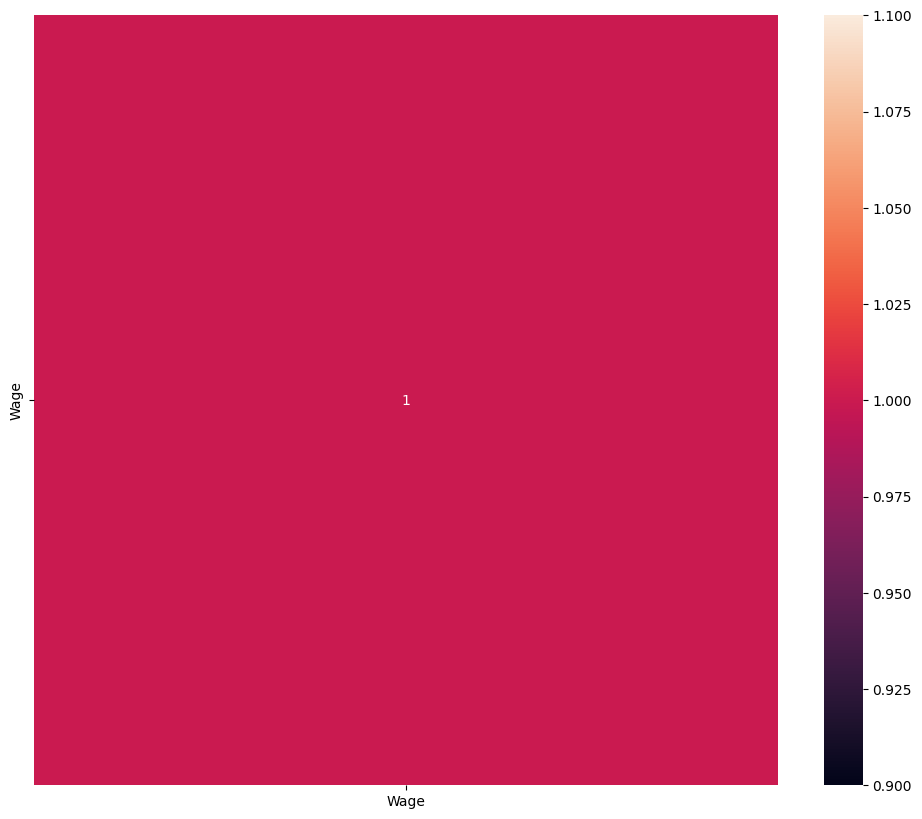

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_df.corr(), annot=True)